In [1]:
import math
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import rebound as rb

In [2]:
"""Intro to Rebound"""

'Intro to Rebound'

In [3]:
"""Question 2"""

sim = rb.Simulation()

sim.move_to_com()
sim.integrator = "whfast"

sim.add(m=1, hash="Binary 1")
sim.add(m=1, a=1, e= 0.1, hash="Binary 2", f=np.random.rand()*2*np.pi)
sim.add(a=2.5, e= 0.4, hash="Test Planet", f=np.random.rand()*2*np.pi)

spec_int = np.pi # half of one full orbit
sim.initSimulationArchive("Section2Q2.bin", interval = spec_int)

N_orbit = 6*np.pi #3 full orbits

sim.integrate(N_orbit, exact_finish_time=0) #setting flag to integrate up to timestep nearest to endtime
sim.dt = 1e-3

sim.exit_max_distance = 4*1

In [4]:
sim.status()
# help(rb.Simulation.initSimulationArchive)

---------------------------------
REBOUND version:     	3.5.13
REBOUND built on:    	Apr 23 2018 14:26:51
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	1.8850000000001419e+01
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=11.833167748516802 y=6.634061226379687 z=0.0 vx=1.1020707168291786 vy=-0.21612865245577711 vz=0.0>
<rebound.Particle object, m=1.0 x=12.526882363995547 y=7.2393024494335645 z=0.0 vx=0.16765213261591827 vy=0.9970158631931711 vz=0.0>
<rebound.Particle object, m=0.0 x=17.429162203620912 y=-2.850351687813143 z=0.0 vx=1.3253912960164955 vy=-0.45613549573884743 vz=0.0>
---------------------------------


In [5]:
"""Question 3"""

sim2 = rb.Simulation()

sim2.move_to_com()
sim2.integrator = "whfast"

sim2.add(m=1, hash="Binary 1")
sim2.add(m=1, hash="Binary 2", a=1, e=0.5)
sim2.add(hash="Planet", a=4, e=0)

N2_orbit = 10*2*np.pi
sim2.dt = 1e-3

In [6]:
sim2.status()

---------------------------------
REBOUND version:     	3.5.13
REBOUND built on:    	Apr 23 2018 14:26:51
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=1.0 x=0.5 y=0.0 z=0.0 vx=0.0 vy=2.449489742783178 vz=0.0>
<rebound.Particle object, m=0.0 x=4.25 y=0.0 z=0.0 vx=0.0 vy=1.9318516525781364 vz=0.0>
---------------------------------


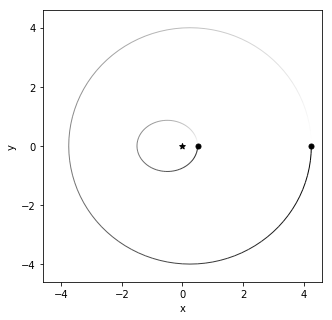

In [7]:
%matplotlib inline

fig = rb.OrbitPlot(sim2)
plt.savefig('orbitalplot.pdf')

Text(0.5, 1.0, 'Manual Orbital Plot')

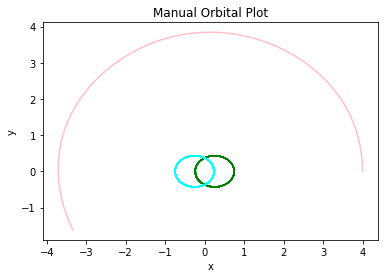

In [8]:
particles2 = sim2.particles
fig, ax = plt.subplots()
ax.plot()

torb = 6*np.pi
Noutputs = 100
times = np.linspace(0, torb, Noutputs)

b1x = []
b1y = []

b2x = []
b2y = []

px = []
py = []


sim2.move_to_com()
for i, time in enumerate(times):
    sim2.integrate(time,exact_finish_time=0)
    b1x.append(particles2[0].x)
    b1y.append(particles2[0].y)
    b2x.append(particles2[1].x)
    b2y.append(particles2[1].y)
    px.append(particles2[2].x)
    py.append(particles2[2].y)

plt.plot(b1x,b1y, color='green')
plt.plot(b2x,b2y, color='cyan')
plt.plot(px,py, color='pink')   
plt.xlabel("x")
plt.ylabel("y")
plt.title("Manual Orbital Plot")

#plt.savefig('manualorbit.png')

In [9]:
sim2.status()

---------------------------------
REBOUND version:     	3.5.13
REBOUND built on:    	Apr 23 2018 14:26:51
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	1.8850000000001419e+01
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.45043090883256565 y=-0.3966996194709873 z=0.0 vx=0.5396460230574781 vy=0.20449050907872746 vz=0.0>
<rebound.Particle object, m=1.0 x=-0.45043090883256565 y=0.3966996194709873 z=0.0 vx=-0.5396460230574781 vy=-0.20449050907872746 vz=0.0>
<rebound.Particle object, m=0.0 x=-3.334454273134022 y=-1.6184443663687054 z=0.0 vx=0.3211629737155257 vy=-0.692784278538448 vz=0.0>
---------------------------------


In [10]:
"""Classic Results"""

'Classic Results'

In [11]:
""" Question 1"""

# tuples are of order (e_b, a_p) binary eccentricity 
# and planetary semi-major axis
tup1 = (0.0, 1.0)
tup2 = (0.175, 2.0)
tup3 = (0.35, 3.0)
tup4 = (0.525, 4.0)
tup5 = (0.7, 5.0)

tup_list = (tup1, tup2, tup3, tup4, tup5)

survival_times = []

def survival(tuple):
    sim3 = rb.Simulation()
    sim3.move_to_com()
    sim3.dt = 1e-3
    
    N_orbit = (10e1)*2*np.pi
    sim3.add(m=1, hash="Binary 1")
    sim3.add(m=1, a=1, e=tuple[0], hash="Binary 2", f=np.random.rand()*2*np.pi)
    sim3.add(a=tuple[1], e=0, hash="Test Planet", f=np.random.rand()*2*np.pi)
    
    sim3.integrate(N_orbit, exact_finish_time=0)
    
    if tuple[0] == round(sim3.particles[1].e, 3): 
        survival_times.append(sim3.particles[2].P)
        
    if tuple[1] == round(sim3.particles[2].a):
        survival_times.append(sim.particles[2].P)
        
    return survival_times

In [12]:
pool = rb.InterruptiblePool(10)

In [13]:
pool.map(func= survival, iterable= tup_list)

[[-8.218545794063495],
 [-12.200291457732984],
 [441.85975890381246],
 [34.13774448795459, -16.518234436671847],
 [47.86018734575048, -16.518234436671847]]

In [14]:
# last section for part 3, need to figure out how to get all 10 points for pool.map
#fig = plt.figure()
#plt.pcolormesh

In [15]:
# help(rb.InterruptiblePool.map)
# sim3.InterruptiblePool.map(self, func that i create, interable (tuple maybe))